In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [120]:
REPEATS = 100
plt.rcParams["figure.figsize"] = (10.6, 5.3)

In [121]:
def get_samples(sigma, N):
    return np.random.normal(0, sigma, N)

In [122]:
def get_intervals_length_a(sigma, gamma, N):
    all_lengths = []
    for _ in range(REPEATS):
        sum_samples_square = sum(get_samples(sigma, N) ** 2)
        lambda_left = scipy.stats.chi2.ppf((1 + gamma) / 2, N)
        lambda_right = scipy.stats.chi2.ppf((1 - gamma) / 2, N)
        all_lengths.append(sum_samples_square / lambda_right - sum_samples_square/lambda_left)
    return np.mean(all_lengths)

def get_intervals_length_b(sigma, gamma, N):
    all_lengths = []
    for _ in range(REPEATS):
        mean_samples_square = (get_samples(sigma, N).mean()) ** 2
        z_left_sq = (scipy.stats.norm.ppf((3 + gamma) / 4)) ** 2
        z_right_sq = (scipy.stats.norm.ppf((3 - gamma) / 4)) ** 2
        all_lengths.append(N * mean_samples_square / z_right_sq - N * mean_samples_square / z_left_sq)
    return np.mean(all_lengths)

In [123]:
Ns = np.arange(1, 2000, 50)
Lengths_a = [get_intervals_length_a(1, 0.8, n) for n in Ns]
Lengths_b = [get_intervals_length_b(1, 0.8, n) for n in Ns]

### Сравнение результатов для двух статистик:

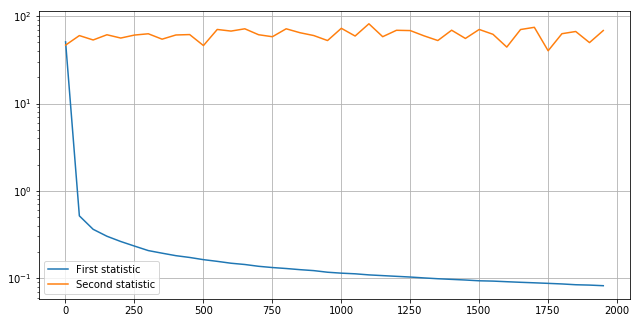

In [124]:
plt.plot(Ns, Lengths_a, label='First statistic')
plt.plot(Ns, Lengths_b, label='Second statistic')
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

### Результаты в зависимости от дисперсии:

In [125]:
Length_a_1 = [get_intervals_length_a(1, 0.8, n) for n in Ns]
Length_a_2 = [get_intervals_length_a(1.5, 0.8, n) for n in Ns]
Length_a_3 = [get_intervals_length_a(5, 0.8, n) for n in Ns]

Length_b_1 = [get_intervals_length_b(1, 0.8, n) for n in Ns]
Length_b_2 = [get_intervals_length_b(1.5, 0.8, n) for n in Ns]
Length_b_3 = [get_intervals_length_b(5, 0.8, n) for n in Ns]

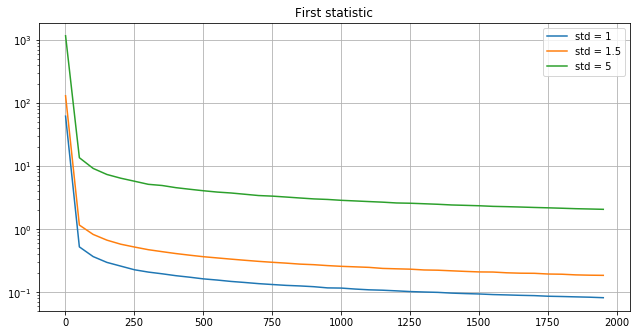

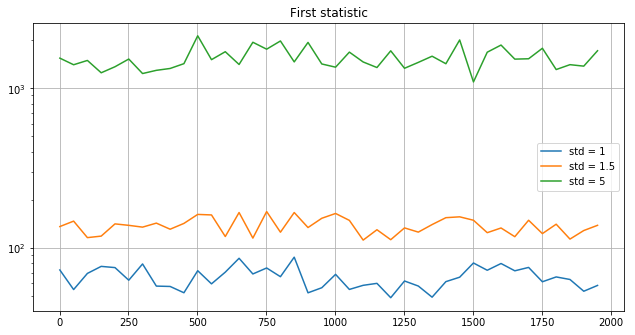

In [126]:
plt.plot(Ns, Length_a_1, label=f'std = {1}')
plt.plot(Ns, Length_a_2, label=f'std = {1.5}')
plt.plot(Ns, Length_a_3, label=f'std = {5}')
plt.grid()
plt.legend()
plt.title("First statistic")
plt.yscale('log')
plt.show()

plt.plot(Ns, Length_b_1, label=f'std = {1}')
plt.plot(Ns, Length_b_2, label=f'std = {1.5}')
plt.plot(Ns, Length_b_3, label=f'std = {5}')
plt.grid()
plt.legend()
plt.title("First statistic")
plt.yscale('log')
plt.show()

### Результаты в зависимости от $\gamma$:

In [127]:
Length_a_1 = [get_intervals_length_a(1, 0.1, n) for n in Ns]
Length_a_2 = [get_intervals_length_a(1, 0.5, n) for n in Ns]
Length_a_3 = [get_intervals_length_a(1, 0.95, n) for n in Ns]

Length_b_1 = [get_intervals_length_b(1, 0.1, n) for n in Ns]
Length_b_2 = [get_intervals_length_b(1, 0.5, n) for n in Ns]
Length_b_3 = [get_intervals_length_b(1, 0.95, n) for n in Ns]

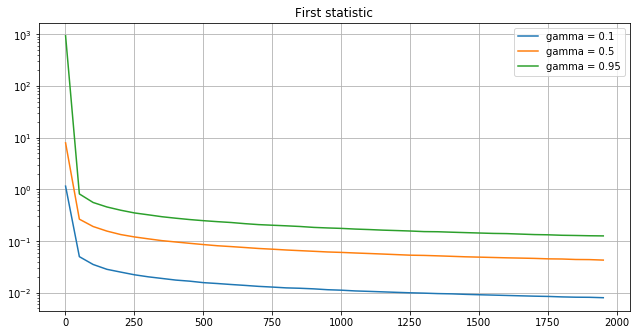

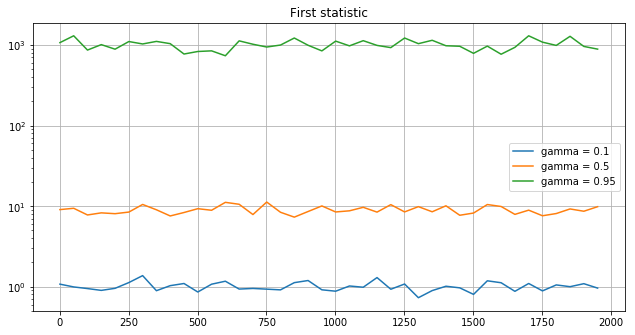

In [128]:
plt.plot(Ns, Length_a_1, label=f'gamma = {0.1}')
plt.plot(Ns, Length_a_2, label=f'gamma = {0.5}')
plt.plot(Ns, Length_a_3, label=f'gamma = {0.95}')
plt.grid()
plt.legend()
plt.title("First statistic")
plt.yscale('log')
plt.show()

plt.plot(Ns, Length_b_1, label=f'gamma = {0.1}')
plt.plot(Ns, Length_b_2, label=f'gamma = {0.5}')
plt.plot(Ns, Length_b_3, label=f'gamma = {0.95}')
plt.grid()
plt.legend()
plt.title("First statistic")
plt.yscale('log')
plt.show()

### Вывод:

Использовать следует первый доверительный интервал, так как про него мы можем быть уверены, что если мы увеличим размер выборки то результат (длина интервала) улучшится.

Если жеиспользовать второй доверительный интервал то ничего нельзя сказать про то, каким будет его длина в зависимости от выборки